In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Retail_Transactions_2000.csv')

In [3]:
df.shape

(2000, 11)

In [4]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [6]:
df.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [7]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


In [9]:
print(df['Gender'].value_counts())
print(df['City'].value_counts())
print(df['ProductCategory'].value_counts())


Gender
Male      673
Female    664
Other     663
Name: count, dtype: int64
City
Ahmedabad    222
Bengaluru    217
Lucknow      213
Mumbai       202
Delhi        199
Jaipur       196
Kolkata      196
Chennai      187
Hyderabad    185
Pune         183
Name: count, dtype: int64
ProductCategory
Furniture      313
Beauty         303
Books          301
Electronics    281
Groceries      281
Sports         262
Fashion        259
Name: count, dtype: int64


In [10]:
df['Gender'] = df['Gender'].str.strip().str.lower().replace({'m': 'male', 'male': 'male', 'MALE': 'male', 'f': 'female', 'female': 'female', 'FEMALE': 'female', 'o': 'other', 'other': 'other', 'OTHER': 'other'})
df['Gender'] = df['Gender'].str.capitalize()


In [11]:
df.loc[df['Quantity'] <= 0, 'Quantity'] = np.nan
df.loc[df['Price'] <= 0, 'Price'] = np.nan
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Price'].fillna(df['Price'].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13412\3078843406.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13412\3078843406.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [12]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3.0,4479.0,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5.0,1051.0,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1.0,111.0,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5.0,2946.0,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1.0,3123.0,2023-09-23,Wallet,3123


In [13]:
df['TotalAmount'] = df['Quantity'] * df['Price']


In [14]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()


In [15]:
bins = [0, 17, 25, 40, 60, np.inf]
labels = ['<18','18-25','26-40','41-60','60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [16]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le_gender = LabelEncoder()
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])


In [17]:
le_city = LabelEncoder()
df['City_encoded'] = le_city.fit_transform(df['City'])


In [18]:
le_category = LabelEncoder()
df['ProductCategory_encoded'] = le_category.fit_transform(df['ProductCategory'])


In [19]:
scaler = MinMaxScaler()
df[['Age_norm', 'Price_norm', 'TotalAmount_norm']] = scaler.fit_transform(df[['Age', 'Price', 'TotalAmount']])

In [20]:
df.isnull().sum()


TransactionID              0
CustomerID                 0
Gender                     0
Age                        0
City                       0
ProductCategory            0
Quantity                   0
Price                      0
PurchaseDate               0
PaymentMode                0
TotalAmount                0
Month                      0
DayOfWeek                  0
AgeGroup                   0
Gender_encoded             0
City_encoded               0
ProductCategory_encoded    0
Age_norm                   0
Price_norm                 0
TotalAmount_norm           0
dtype: int64

In [21]:
df.to_csv('Retail_Cleaned.csv')

In [22]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup,Gender_encoded,City_encoded,ProductCategory_encoded,Age_norm,Price_norm,TotalAmount_norm
0,T00001,C2824,Female,33,Bengaluru,Fashion,3.0,4479.0,2023-03-15,Cash,13437.0,3,Wednesday,26-40,0,1,3,0.288462,0.893673,0.536495
1,T00002,C1409,Other,20,Pune,Books,5.0,1051.0,2023-01-22,Card,5255.0,1,Sunday,18-25,2,9,1,0.038462,0.194082,0.207094
2,T00003,C5506,Other,47,Pune,Furniture,1.0,111.0,2023-04-18,Wallet,111.0,4,Tuesday,41-60,2,9,4,0.557692,0.002245,0.000000
3,T00004,C5012,Other,21,Hyderabad,Groceries,5.0,2946.0,2023-08-09,Cash,14730.0,8,Wednesday,18-25,2,4,5,0.057692,0.580816,0.588550
4,T00005,C4657,Female,41,Chennai,Sports,1.0,3123.0,2023-09-23,Wallet,3123.0,9,Saturday,41-60,0,2,6,0.442308,0.616939,0.121261


PART B

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


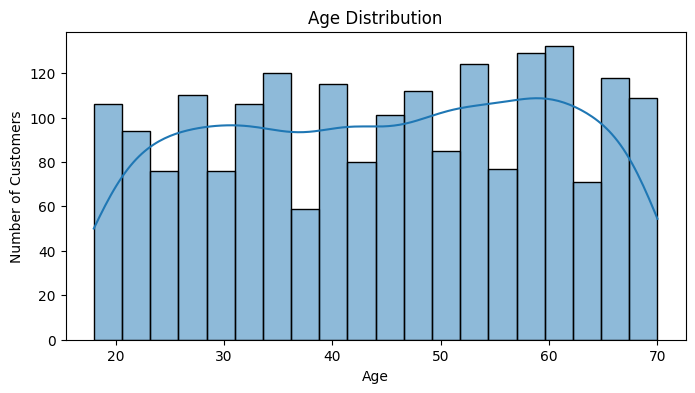

In [24]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


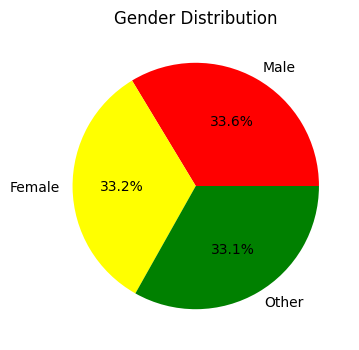

In [25]:
# Gender distribution
plt.figure(figsize=(5,4))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red','yellow','green'])
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()


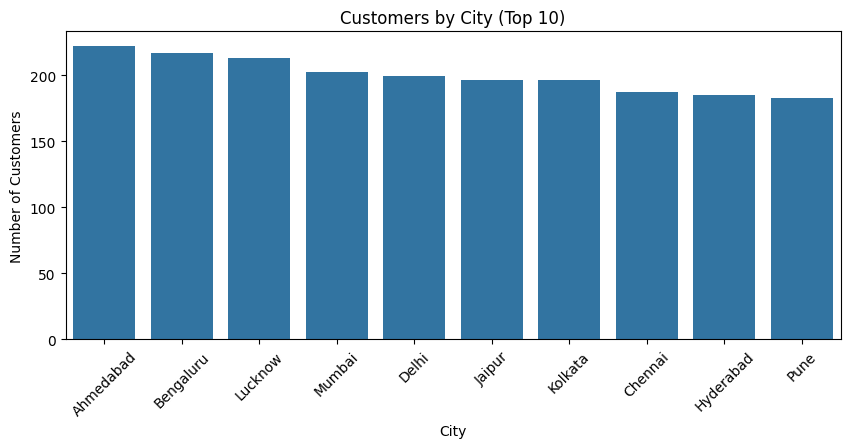

In [26]:
# Customers by city (Top 10)
plt.figure(figsize=(10,4))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Customers by City (Top 10)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


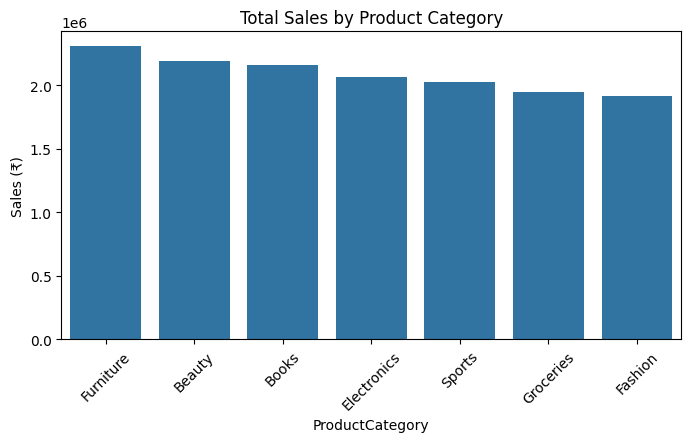

In [27]:
# Total sales by product category
plt.figure(figsize=(8,4))
sales_category = df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
sns.barplot(x=sales_category.index, y=sales_category.values)
plt.title('Total Sales by Product Category')
plt.ylabel('Sales (₹)')
plt.xticks(rotation=45)
plt.show()


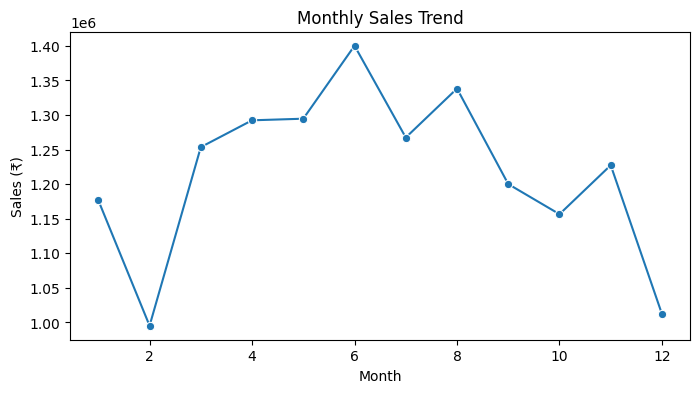

In [28]:
# Monthly sales trend (line chart)
plt.figure(figsize=(8,4))
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (₹)')
plt.show()


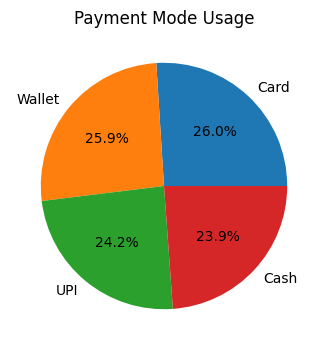

In [29]:
# Payment mode usage (pie chart)
plt.figure(figsize=(6,4))
df['PaymentMode'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Payment Mode Usage')
plt.ylabel('')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13412\1818799192.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()


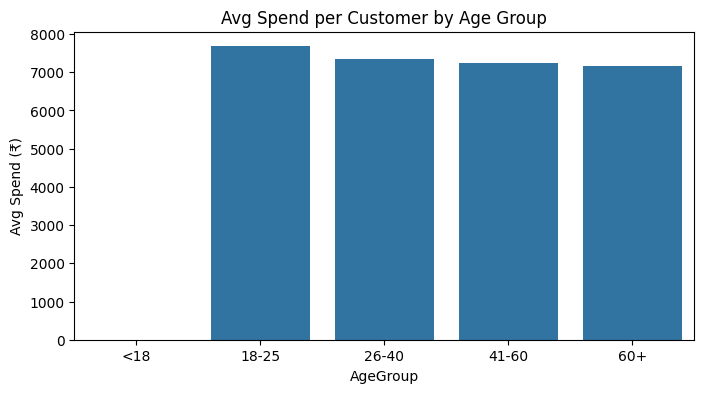

In [30]:
# Average spend per customer by age group
plt.figure(figsize=(8,4))
avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()
sns.barplot(x=avg_spend_age.index.astype(str), y=avg_spend_age.values)
plt.title('Avg Spend per Customer by Age Group')
plt.ylabel('Avg Spend (₹)')
plt.show()


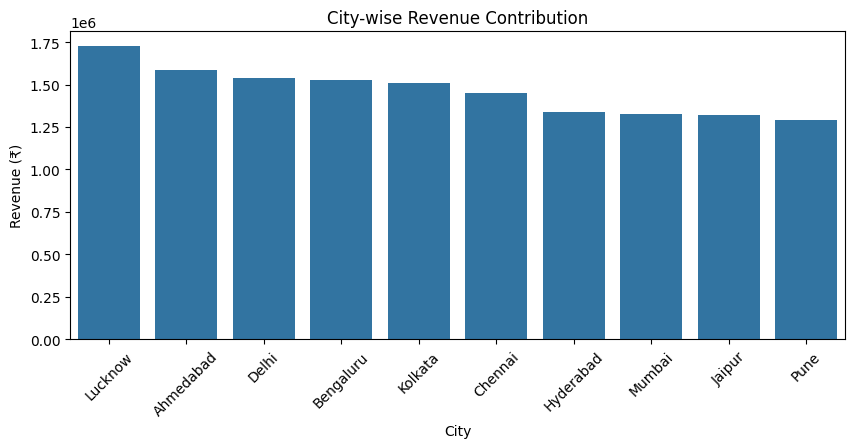

In [31]:
# City-wise revenue contribution
plt.figure(figsize=(10,4))
city_revenue = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=city_revenue.index, y=city_revenue.values)
plt.title('City-wise Revenue Contribution')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.show()


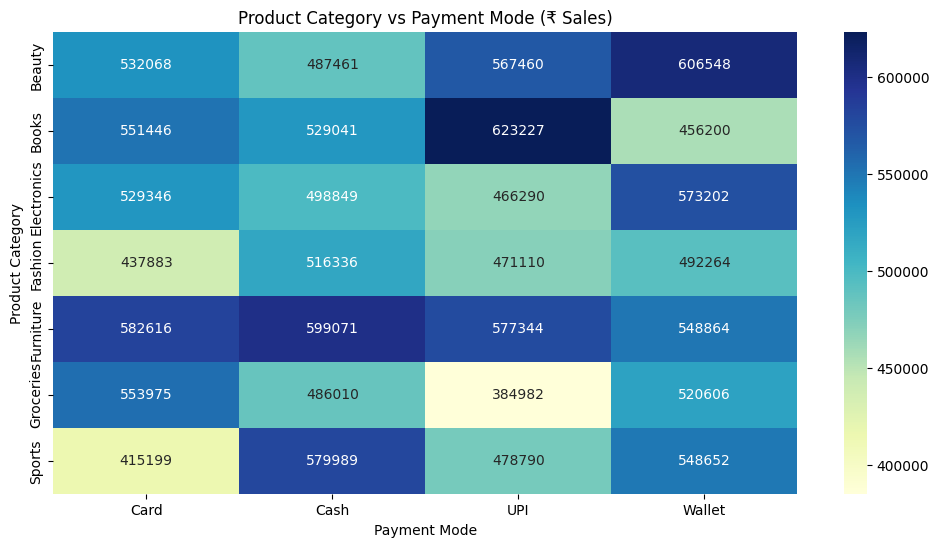

In [32]:
# Heatmap: Product category vs payment mode
plt.figure(figsize=(12,6))
pivot = df.pivot_table(index='ProductCategory', columns='PaymentMode', values='TotalAmount', aggfunc='sum', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Product Category vs Payment Mode (₹ Sales)')
plt.ylabel('Product Category')
plt.xlabel('Payment Mode')
plt.show()